# Рекомендательные системы

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Пример для набора данных MovieLens

Набор данных `ml-25m` включает в себя описание 5-звёздного рейтинга фильмов с сайта [MovieLens](http://movielens.org), одного из старейших сервисов по рекомендации фильмов. Набор данных содержит 25000095 оценок и 1093360 применений тэгов к 62423 фильмам. Эти данные были созданы 162541 пользователями в период с 9 января 1995 года по 21 ноября 2019 года, именно в этот день был сгенерирован датасет.

Пользователи были выбраны случайно, при условии, что пользователь оценил как минимум 20 фильмов. Демографическая информация в набор данных не включена. Каждый пользователь представлен только `id`.

Данные включают в себя файлы: `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` и `tags.csv`. 

Они доступны для скачавания (как и другие даннее от GroupLens) по ссылке <http://grouplens.org/datasets/>.

In [ ]:
import numpy as np
import pandas as pd 

### Tags Data File Structure (tags.csv)
-----------------------------------

Все тэги содержаться в файле `tags.csv`. Каждая строка в файле представлена в формате:

    userId,movieId,tag,timestamp

Тэги - это сгенерированные пользователями метаданные о фильмах. Каждый тэг обычно представляет собой слово или коротку фразу. Значение, ценность и цель каждого тэга определяется каждым пользователем.

Таймстэмп (Timestamps) - это количество секунд, прошедших с 1 января 1970.

In [ ]:
downloaded = drive.CreateFile({'id':"1AFJdxwFCSOyCVFmtmlaUzY9OunwbAVVZ"}) 
downloaded.GetContentFile('tags.csv')
tag=pd.read_csv('tags.csv')

In [ ]:
tag.sample(10)

,userId,movieId,tag,timestamp
827006,114884,122906,military,1525794374
41481,6550,283,police,1528558940
958372,140454,7153,own,1161533116
190685,6550,158549,psychiatrist,1527133782
61166,6550,3091,warlord,1527452134
859335,120859,2975,Terrence Howard,1186184969
841989,117789,8576,small town,1247121222
103218,6550,43518,biography,1527229444
440932,43321,94959,stylized,1514163510
664169,82788,68159,Rachel McAdams,1543681745


In [ ]:
tag.sort_values(by=['userId','movieId'])

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


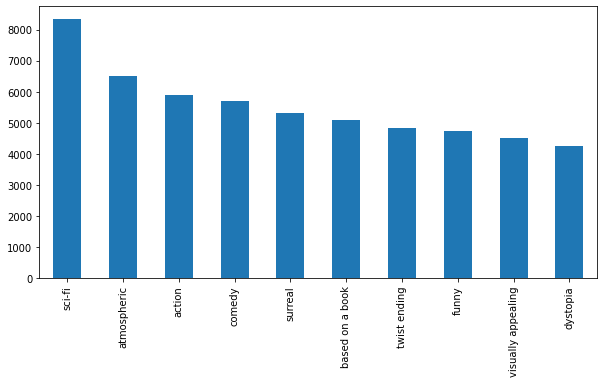

In [ ]:
tag_counts = tag['tag'].value_counts()
tag_counts[:10].plot(kind='bar', figsize=(10,5))

### Ratings Data File Structure (ratings.csv)
-----------------------------------------

Оценки пользователей за фильмы представлены в файле `ratings.csv`. Каждая строка записана в следующем формате:

    userId,movieId,rating,timestamp

Строки упорядочены по `userId`, а затем по `movieId`.

Рейтинги предствляют собой школу из 5 звёзд, с использованием половинки звезды (0.5 звёзд до 5.0 звёзд).

In [ ]:
downloaded = drive.CreateFile({'id':"1PZZUhKWPmRCzgwJP9yX5g7ZycV273oVk"}) 
downloaded.GetContentFile('rating.csv')
rating=pd.read_csv('rating.csv')

In [ ]:
rating.sample(10)

,userId,movieId,rating,timestamp
17868447,115870,165,3.0,844258319
16546146,107360,73,5.0,869220398
3258610,21519,5378,2.0,1177991382
18995029,123183,2028,3.5,1176384837
1084917,7322,1967,4.0,1218396391
21005614,136549,339,3.5,1298840953
18486643,119776,5618,4.5,1454644391
24046432,156274,3897,4.0,1223144685
13357080,86427,4223,4.0,1010449309
10333588,67022,96737,4.0,1551222114


In [ ]:
rating.shape

(25000095, 4)

In [ ]:
rating['userId'].value_counts().shape # посчитаем, сколько у нас пользователей

(162541,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f935a7f2390>]],
      dtype=object)

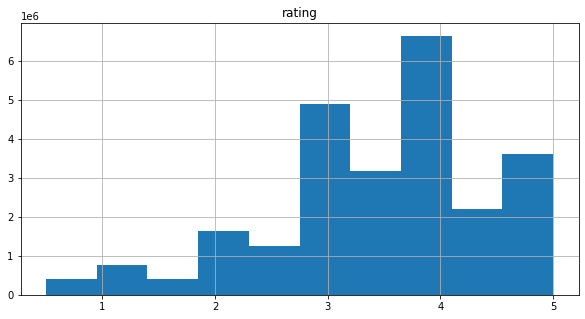

In [ ]:
rating.hist(column='rating', figsize=(10,5)) # гистограмма для рейтингов

### Movies Data File Structure (movies.csv)
---------------------------------------

Информация о фильмах содержится в файле `movies.csv`. Каждая строка представляет информацию об одном фильме в следующем формате:

    movieId,title,genres

Названия фильмов вводились вручную или были импортированы с сайта <https://www.themoviedb.org/>, в поле `title` после названия фильма в скобках указан год выпуска. В названиях могут быть ошибки.

Жанры фильма записываются в одном поле через разделитель |. Список допустимых жанров:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)


In [ ]:
downloaded = drive.CreateFile({'id':"1Wgw78UNg1uPV238DH0Oj3QYLfgiU7qpg"}) 
downloaded.GetContentFile('movies.csv')
movies=pd.read_csv('movies.csv')

### Tag Genome (genome-scores.csv and genome-tags.csv)
-------------------------------------------------

[genome-paper]: http://files.grouplens.org/papers/tag_genome.pdf

Tag genome - это структура данных, которая описывает релевантность тэгов по отношению к фильму. Заданы 1128 тэгов, и по каждому фильму указаны значения релевантности для каждого тэга.

Описание [в статье][genome-paper]. Tag genome был рассчитан с помощью алгоритма на основе пользовательского контента, включая тэги, ретинги и текстовые описания.

Файл `genome-scores.csv` содержит релевантность тэгов по отношению к фильмам:

    movieId,tagId,relevance

Файл `genome-tags.csv` содержит описания тэгов:

    tagId,tag

`tagId` значения сгенерированы в тот момент, когда экспортировался весь набор данных, так что `tagId` могут быт не такими как в других версиях датасетов от MovieLens (например, 1М и 20M).

> Jesse Vig, Shilad Sen, and John Riedl. 2012. The Tag Genome: Encoding Community Knowledge to Support Novel Interaction. ACM Trans. Interact. Intell. Syst. 2, 3: 13:1–13:44. <https://doi.org/10.1145/2362394.2362395>


In [ ]:
downloaded = drive.CreateFile({'id':"1k4ZwrBeCO80LHThymYzHfD_H-gGCaMr8"}) 
downloaded.GetContentFile('genome-scores.csv')
genome_scores=pd.read_csv('genome-scores.csv')

In [ ]:
downloaded = drive.CreateFile({'id':"12lE3TfDja2VPrqbHpXc92m2r0Sdf0Sog"}) 
downloaded.GetContentFile('genome-tags.csv')
genome_tag=pd.read_csv('genome-tags.csv')

In [ ]:
genome_scores[genome_scores.movieId == 442]

,movieId,tagId,relevance
474888,442,1,0.04525
474889,442,2,0.04575
474890,442,3,0.03475
474891,442,4,0.04700
474892,442,5,0.06375
...,...,...,...
476011,442,1124,0.04400
476012,442,1125,0.03250
476013,442,1126,0.00800
476014,442,1127,0.11775


In [ ]:
genome_tag[genome_tag.tag == 'dragon']

,tagId,tag
320,321,dragon


In [ ]:
dragon_movies = tag[tag.tag == 'dragon']
movies[movies.movieId.isin(dragon_movies.movieId)]

,movieId,title,genres
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
642,653,Dragonheart (1996),Action|Adventure|Fantasy
1007,1030,Pete's Dragon (1977),Adventure|Animation|Children|Musical
1818,1907,Mulan (1998),Adventure|Animation|Children|Comedy|Drama|Musi...
2006,2096,Sleeping Beauty (1959),Animation|Children|Musical
...,...,...,...
51002,182211,Hell's Bells (1929),Animation
52170,184719,Achoo (2017),Animation|Comedy
52748,185961,Airlords of Airia (2013),Sci-Fi
53177,186881,Butter on the Latch (2013),Drama|Fantasy|Horror


### Links Data File Structure (links.csv)
---------------------------------------

Идентификаторы фильмов с других ресурсов содержатся в файле `links.csv`. Каждая строка представляет собой один фильм в следующем формате:

    movieId,imdbId,tmdbId

movieId - идентификатор фильма на <https://movielens.org>. Например, фильм Toy Story имеет ссылку <https://movielens.org/movies/1>.

imdbId - идентификатор фильма на <http://www.imdb.com>. Например, фильм Toy Story имеет ссылку <http://www.imdb.com/title/tt0114709/>.

tmdbId is - идентификатор фильма на <https://www.themoviedb.org>. Например, фильм Toy Story имеет ссылку <https://www.themoviedb.org/movie/862>.



In [ ]:
downloaded = drive.CreateFile({'id':"1kx_nH4Sv9h1h9fXoLN6531YZWsDxXqO-"}) 
downloaded.GetContentFile('links.csv')
link=pd.read_csv('links.csv')

In [ ]:
link[link.movieId == 1]

,movieId,imdbId,tmdbId
0,1,114709,862.0


### Понимание данных

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Представление жанров не очень хорошее, не очень понятно, что с ними можно делать. Очень часто для подобных данных используется следующий подход: под каждый жанр создаётся новый столбец, в соответствующем жанру столбце у фильма записывается 1, если в перечне был такой жанр, и 0 - если не было. (Этот подход чем-то похож на one-hot encoding).

Вторая проблема с данными: наличие в столбце title года выпуска фильма. Лучше всего под год выпуска выделить отдельный столбец.

In [ ]:
data = pd.merge(movies,rating)

In [ ]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [ ]:
data.sample(10)

,movieId,title,genres,userId,rating,timestamp
19758025,37729,Corpse Bride (2005),Animation|Comedy|Fantasy|Musical|Romance,70439,5.0,1260911325
16416781,5313,The Scorpion King (2002),Action|Adventure|Fantasy|Thriller,13011,2.5,1092116103
4747882,785,Kingpin (1996),Comedy,45005,4.0,865290211
6900011,1238,Local Hero (1983),Comedy,124342,4.0,955301471
11206407,2498,My Favorite Martian (1999),Comedy|Sci-Fi,133571,2.5,1057042984
7509536,1297,Real Genius (1985),Comedy,27125,2.0,1028362681
4520771,736,Twister (1996),Action|Adventure|Romance|Thriller,17119,2.5,1091610442
18518126,7918,"Indian Runner, The (1991)",Drama,112251,1.0,1137347390
13034831,3115,Flawless (1999),Drama,34368,3.0,1003718337
23157009,96728,"Master, The (2012)",Drama,26274,3.0,1485726204


In [ ]:
data.shape

(25000095, 6)

In [ ]:
number_rating = data.groupby('title')['rating'].count().reset_index()

In [ ]:
number_rating.head()

,title,rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1
1,"""Great Performances"" Cats (1998)",179
2,#1 Cheerleader Camp (2010),9
3,#Captured (2017),2
4,#Female Pleasure (2018),3


In [ ]:
data_train = data.sample(10000)
# у меня начиная с 100K не хватает оперативной памяти для построения сводной таблицы.
# на 50K долго считаются статистики 

In [ ]:
data_train.head()

,movieId,title,genres,userId,rating,timestamp
3522524,527,Schindler's List (1993),Drama|War,124577,5.0,840477630
3392880,508,Philadelphia (1993),Drama,72746,3.5,1477171067
4017214,592,Batman (1989),Action|Crime|Thriller,155825,3.0,1085797934
10637853,2322,Soldier (1998),Action|Sci-Fi|War,72885,3.0,945028214
4282144,628,Primal Fear (1996),Crime|Drama|Mystery|Thriller,45984,4.0,1142272824


In [ ]:
movie_pivot = data_train.pivot_table(index = ["userId"],columns = ["title"],values = "rating")

In [ ]:
movie_pivot.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Rules for Sleeping Around (2013),10 Things I Hate About You (1999),100 Feet (2008),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),12 Angry Men (1997),12 Strong (2018),127 Hours (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Hours (2016),13th (2016),"13th Warrior, The (1999)",1492: Conquest of Paradise (1992),15 Minutes (2001),16 Blocks (2006),17 Again (2009),187 (One Eight Seven) (1997),1941 (1979),2 Days in Paris (2007),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)","20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),2046 (2004),21 (2008),21 Grams (2003),22 Bullets (L'immortel) (2010),22 July (2018),24 Hour Party People (2002),"24th Day, The (2004)",25th Hour (2002),27 Dresses (2008),28 Days Later (2002),28 Weeks Later (2007),...,X2: X-Men United (2003),Xanadu (1980),Year One (2009),"Year of Living Dangerously, The (1982)",Yes Man (2008),Yi Yi (2000),Yojimbo (1961),Yolki (2010),Yonlu (2017),You Don't Mess with the Zohan (2008),You Kill Me (2007),You Only Live Twice (1967),You're Too Careless with Your Kisses! (1932),You've Got Mail (1998),"You, Me and Dupree (2006)",Young Adam (2003),Young Frankenstein (1974),Young Guns (1988),Young People Fucking (a.k.a. YPF) (2007),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),"Young Victoria, The (2009)",Your Name. (2016),Youth (2015),Youth in Revolt (2009),Zack and Miri Make a Porno (2008),Zapped! (1982),"Zed & Two Noughts, A (1985)",Zeitgeist: The Movie (2007),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Матрица предпочтений состоит практически из одних нулей.

На такой матрице практически невозможно найти хоть что-то. Например, поищем похожий фильм.

In [ ]:
watched_movie = movie_pivot['10 Things I Hate About You (1999)']

In [ ]:
similar_movies = movie_pivot.corrwith(watched_movie)
similar_movies = similar_movies.sort_values(ascending=False)
similar_movies.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
10 Things I Hate About You (1999)      1.0
'burbs, The (1989)                     NaN
(500) Days of Summer (2009)            NaN
10 Cloverfield Lane (2016)             NaN
10 Rules for Sleeping Around (2013)    NaN
dtype: float64

## Задание 2.1

Выход из этой ситуации такой.

Будем делать рекомендации не всем и сразу, а конкретному пользователю. Формировать `movie_pivot` будем только для этого конкретного пользователя.

1. Возьмём все оценки, которые поставил пользователь $U$
2. По фильмам $M_U$, которые он оценил, получим всех пользователей, которые ставили этим фильмам оценки
3. Скорее всего и на этом этапе список получится большим (для случайного пользователя у меня получилось 1.7 миллионов строк). Например, оставить только пользователей, у которых много общих фильмов.
4. Для каждого пользователя посчитаем похожесть (например, корреляцию)
5. Отсортируем пользователей по похожести.
6. Оставим только $k$ самых похожих пользователей. 

Пример решения:

Выбираем случайного пользователя

In [ ]:
all_users = rating['userId'].value_counts()
user = all_users.sample(1).index
user

Int64Index([60457], dtype='int64')

Получаем фильмы, которые пользователь посмотрел

In [ ]:
user_movies = data[data.userId == user[0]]
user_movies = user_movies.drop(['genres', 'timestamp', 'userId'], axis = 1)
user_movies.head()

,movieId,title,rating
116662,6,Heat (1995),5.0
202092,14,Nixon (1995),3.0
215208,16,Casino (1995),4.5
350585,29,"City of Lost Children, The (Cité des enfants p...",3.5
383557,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),5.0


Теперь найдём пользователей, которые смотрели эти фильмы

In [ ]:
new_data = data[data.movieId.isin(user_movies.movieId)]
new_data = new_data.drop(['genres', 'timestamp'], axis = 1)
new_data.sample(10)

,movieId,title,userId,rating
19786471,38061,Kiss Kiss Bang Bang (2005),54164,3.5
15770614,4855,Dirty Harry (1971),12608,2.5
5658876,1073,Willy Wonka & the Chocolate Factory (1971),8646,3.0
1973684,296,Pulp Fiction (1994),75328,3.0
562781,47,Seven (a.k.a. Se7en) (1995),125035,4.0
13799785,3527,Predator (1987),116250,4.0
2178684,318,"Shawshank Redemption, The (1994)",91086,5.0
6338877,1198,Raiders of the Lost Ark (Indiana Jones and the...,150513,5.0
5114974,912,Casablanca (1942),32810,5.0
12063673,2762,"Sixth Sense, The (1999)",142758,3.5


Как по ID пользователя получить список его фильмов:

In [ ]:
users_group = new_data.groupby(['userId'])
#users_group.get_group(user[0])

In [ ]:
user[0]

60457

In [ ]:
sorted_users_group = sorted(users_group,  key=lambda x: len(x[1]), reverse=True)
#sorted_users_group[:3]

Выведем ID пользователя, у которого больше всего одинаковых фильмов

In [ ]:
similar_movies_user = sorted_users_group[1][0] # скорее всего, в sorted_users_group[0][0] сидит сам пользователь

In [ ]:
person2 = users_group.get_group(similar_movies_user).sort_values(by='movieId')

Получим список одинаковых фильмов для двух пользователей с оценками.

In [ ]:
temp = user_movies[user_movies['movieId'].isin(users_group.get_group(user[0])['movieId'])]

In [ ]:
person1 = temp.sort_values(by='movieId')

In [ ]:
person1

Посчитаем коэффициент корреляции Пирсона для этих двух пользователей


In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(person1.rating, person2.rating)[0]

Дальше нужно дописать самостоятельно. Нужно пройтись по всем пользователям и отсортировать их по похожести и оставить $k$ самых похожих.

In [ ]:
random_users = new_data.sample(50)
random_users = random_users.userId.unique()

In [ ]:
pearsonCorDict = {}
for u in random_users:
  person2 = users_group.get_group(u).sort_values(by='movieId')
  temp = user_movies[user_movies['movieId'].isin(users_group.get_group(u)['movieId'])]
  person1 = temp.sort_values(by='movieId')
  if pearsonr(person1.rating, person2.rating)[0] > 0.0: # оставляем только пользователей с неотрицательной корреляцией
    pearsonCorDict[u] = pearsonr(person1.rating, person2.rating)[0]

In [ ]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

In [ ]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[:7]
topUsers

Теперь у нас есть похожие пользователи. Получим оценки, которые они ставили за все фильмы.

In [ ]:
topUsersRating=topUsers.merge(data, left_on='userId', right_on='userId', how='inner')
topUsersRating.sample(10)

Уберём лишние столбы и получим взвешенную оценку за фильм

In [ ]:
topUsersRating = topUsersRating.drop(['genres', 'timestamp'], axis = 1)
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

Теперь нужно сгруппировать по фильмам и получить сумму взвешенных оценок 

In [ ]:
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

Теперь можно получить рекомендацию:

In [ ]:
recommendation_df = pd.DataFrame()
recommendation_df['score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df = recommendation_df.sort_values(by='score', ascending=False)

In [ ]:
recommendation_df

In [ ]:
recommendation_df = recommendation_df[recommendation_df.score > 4.5]

In [ ]:
recommendation_df = recommendation_df.drop(['movieId'], axis = 1)

In [ ]:
recommendation_df

In [ ]:
recommended_movies=recommendation_df.merge(movies, how = 'inner', on = 'movieId')

In [ ]:
recommended_movies

Что-то получилось. Но теперь нужно оценить качество этой рекомендации. Идея тут такая: разделить исходные данные на train и test. Получить предсказания на train и проверить их на test.

### Разделение на train и test

In [ ]:
# создаем датафреймы для обучающей и тестовой выборки
train_data = pd.DataFrame(columns=data.columns)
test_data = pd.DataFrame(columns=data.columns)

In [ ]:
user_list = data.userId.unique()[:500]

In [ ]:
for user in user_list:  
  user_data = data[data.userId == user]
  print(user)
  user_index_list = list(user_data.index)
  len_list = len(user_index_list)
  print(len_list)
  i = 0
  for j in user_index_list:
    if i <= round(len(list(user_data.index))*0.7):
      current_row = data[data.index == user_data.index[i]]
      train_data = pd.concat([train_data,current_row],axis=0)
      train_data = train_data.drop_duplicates()
      i = i+1
    elif i > round(len(list(user_data.index))*0.7):
      current_row = data[data.index == user_data.index[i]]
      test_data = pd.concat([test_data,current_row],axis=0)
      test_data = test_data.drop_duplicates()
      i = i+1

2
184
3
656
4
242
5
101
8
155
10
53
12
736
13
412
18
187
26
39
36
108
43
420
47
70
50
81
51
20
56
30
57
355
64
53
66
79
67
126
69
149
73
39
75
465
77
45
82
170
86
148
90
33
93
123
95
216
96
55
98
145
109
265
110
48
111
23
112
133
120
640
125
245
127
58
130
71
132
257
143
35
147
199
152
91
158
78
160
96
162
101
163
52
166
611
167
122
171
671
175
576
176
44
186
107
187
1387
188
139
197
83
198
52
200
20
201
302
211
97
216
362
217
407
221
66
224
160
226
575
227
160
228
312
229
92
230
423
233
70
235
146
236
215
242
160
243
660
249
112
256
208
257
83
259
119
261
186
265
96
279
148
285
537
292
157
296
388
297
37
298
20
301
235
302
132
304
323
312
55
318
430
319
162
321
791
323
111
325
105
329
49
339
25
340
24
341
41
350
76
353
20
354
41
355
335
358
148
359
345
360
84
364
253
368
298
369
34
370
380
371
132
372
28
373
74
379
284
380
27
381
29
386
62
392
36
396
315
402
367
405
31
407
89
409
206
411
73
413
50
414
202
416
205
421
62
422
33
424
54
426
1011
428
78
431
602
434
92
435
242
436
53
437
2

In [ ]:
len(train_data)

83545

In [ ]:
len(test_data)

35087

In [ ]:
len(train_data.movieId.unique())

7269

In [ ]:
len(test_data.movieId.unique())

8795

In [ ]:
train_movie_list = train_data.movieId.unique()
test_movie_list = test_data.movieId.unique()

In [ ]:
c = list(set(train_movie_list) - set(test_movie_list))
len(c)

2678

In [ ]:
b = list(set(test_movie_list) - set(train_movie_list))
len(b)

4204

In [ ]:
movies_drop = set(c).union(set(b))
len(movies_drop)

6882

In [ ]:
movies_drop = list(movies_drop)

In [ ]:
new_test_data = test_data.copy()
new_train_data = train_data.copy()

for i in movies_drop:
  new_train_data = new_train_data.drop(new_train_data[new_train_data.movieId == i].index)
  new_test_data = new_test_data.drop(new_test_data[new_test_data.movieId == i].index)

In [ ]:
new_test_data.shape

(27765, 6)

In [ ]:
new_train_data.shape

(65102, 6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
new_train_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Задание2_RecSys/new_train_data.csv')
new_test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Задание2_RecSys/new_test_data.csv')

### Получение предсказаний и проверка

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.stats import pearsonr
import itertools

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Задание2_RecSys/new_train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Задание2_RecSys/new_test_data.csv')

In [ ]:
recommendation_df = pd.DataFrame()

for i in train_data.userId.unique():
  recommendation = pd.DataFrame()
  user_movies = train_data[train_data.userId == i] # фильмы пользователя
  eq_movies = train_data[train_data.movieId.isin(user_movies.movieId)].userId.unique() #пользователи, которые смотрели такие же фильмы
  # создаем словарик для хранения коэффициентов Пирсона
  pearsonCorDict = {}
  user_group = train_data[train_data.movieId.isin(user_movies.movieId)].groupby(['userId'])
  for u in eq_movies:
    person2 = user_group.get_group(u).sort_values(by='movieId')
    person1 = user_movies[user_movies['movieId'].isin(user_group.get_group(u)['movieId'])].sort_values(by='movieId')
    if (len(person1)>=2) and (len(person2)>=2):
      if len(person1.rating) < len(person2.rating):
        persons_pearson = pearsonr(person1.rating[:len(person1.rating)], person2.rating[:len(person1.rating)])[0]
      elif len(person1.rating) > len(person2.rating):
        persons_pearson = pearsonr(person1.rating[:len(person2.rating)], person2.rating[:len(person2.rating)])[0]
      elif len(person1.rating) == len(person2.rating):
        persons_pearson = pearsonr(person1.rating, person2.rating)[0]
      if persons_pearson > 0.0: # оставляем только пользователей с неотрицательной корреляцией
        pearsonCorDict[u] = persons_pearson

  # приводим к датасету, чтобы посмотреть оценки фильмов
  pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
  pearsonDF.columns = ['similarityIndex']
  pearsonDF['userId'] = pearsonDF.index
  pearsonDF.index = range(len(pearsonDF))

  # мержим датасеты
  topUsersRating=pearsonDF.merge(train_data, left_on='userId', right_on='userId', how='inner')
  # фильтруем по фильмам, которым нам нужно поставить оценки
  test_movies = test_data[test_data.userId == i].movieId # фильмы, которые есть у пользователя в test - им нужно поставить оценку
  topUsersRating = topUsersRating[topUsersRating.movieId.isin(test_movies)]

  # считаем оценку
  topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']

  tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
  tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']  
  recommendation['score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
  recommendation['movieId'] = tempTopUsersRating.index
  recommendation['userId'] = i
  recommendation_df = pd.concat([recommendation_df, recommendation])
  recommendation_df = recommendation_df.sort_values(by='score', ascending=False)
  recommendation_df = recommendation_df[recommendation_df.score >= 4.0]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation 

ValueError: ignored

In [ ]:
recommended_movies=recommendation_df.merge(movies, how = 'inner', on = 'movieId')

In [ ]:
recommendation_df.shape

(1558, 3)

Так как в исходном наборе данных оценки могут быть либо целыми, либо половинчатыми (*.5), то необходимо округлить предсказания.

In [ ]:
for i in range(len(recommended_movies.score)):
  if recommended_movies.score[i] - round(recommended_movies.score[i]) > 0.25:
    recommended_movies.score[i] = round(recommended_movies.score[i]) + 0.5
  else:
    recommended_movies.score[i] = float(round(recommended_movies.score[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
recommended_movies = recommended_movies.sort_values(by=['userId', 'movieId'])
test_data = test_data.sort_values(by=['userId', 'movieId'])

In [ ]:
print(len(test_data.userId.unique()))
print(len(recommended_movies.userId.unique()))

499
136


In [ ]:
minus_test_data = list(set(test_data.userId.unique()) - set(recommended_movies.userId.unique()))
len(minus_test_data)

363

In [ ]:
new_test_data = test_data.copy()
new_recommended_movies = recommended_movies.copy()

for i in minus_test_data:
  new_recommended_movies = new_recommended_movies.drop(new_recommended_movies[new_recommended_movies.userId == i].index)
  new_test_data = new_test_data.drop(new_test_data[new_test_data.userId == i].index)

In [ ]:
print(len(new_test_data.userId.unique()))
print(len(new_recommended_movies.userId.unique()))

136
136


In [ ]:
print(len(new_test_data.movieId.unique()))
print(len(new_recommended_movies.movieId.unique()))

2828
625


In [ ]:
minus_test_data = list(set(new_test_data.movieId.unique()) - set(new_recommended_movies.movieId.unique()))
len(minus_test_data)

2203

In [ ]:
for i in minus_test_data:
  new_recommended_movies = new_recommended_movies.drop(new_recommended_movies[new_recommended_movies.movieId == i].index)
  new_test_data = new_test_data.drop(new_test_data[new_test_data.movieId == i].index)

In [ ]:
print(len(new_test_data.movieId.unique()))
print(len(new_recommended_movies.movieId.unique()))

625
625


In [ ]:
print(len(new_test_data))
print(len(new_recommended_movies))

2425
1558


In [ ]:
new_recommended_movies = new_recommended_movies.sort_values(by=['userId', 'movieId'])
new_test_data = new_test_data.sort_values(by=['userId', 'movieId'])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(new_test_data[:1558].rating.to_list(), new_recommended_movies.score.to_list())

1.006418485237484

In [ ]:
from math import sqrt
sqrt(mean_squared_error(test_data[:1558].rating.to_list(), recommended_movies.score.to_list()))

1.1731511825197538

## Задание 2.2

Мы всё ещё не смотрим в контент, хотя его тут очень много. 

Попробуйте по этим данным сделать рекомендацию на основе контента.

Идея тут может быть такая: смотрим на описание фильмов тэгами, а когда пользователь ставит оценку за фильм, мы её засчитываем как оценку за тэги.

Если уж совсем не получится с рекомендательной системой, то можно заняться EDA на этих данных. Например, посмотреть как менялась популярность тэгов со временем, или сделать кластеризацию тэгов или кластеризацию фильмов. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Добавление тэгов

#### Разделение жанров

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


Представление жанров не очень хорошее, не очень понятно, что с ними можно делать. Очень часто для подобных данных используется следующий подход: под каждый жанр создаётся новый столбец, в соответствующем жанру столбце у фильма записывается 1, если в перечне был такой жанр, и 0 - если не было. (Этот подход чем-то похож на one-hot encoding).

Вторая проблема с данными: наличие в столбце title года выпуска фильма. Лучше всего под год выпуска выделить отдельный столбец

#### Выделяем год из названия

In [ ]:
import re

In [ ]:
movies_year = movies.copy()
movies_year.insert(2,'year', movies_year['title'].apply(lambda x: re.findall(r'\(\d\d\d\d\)', x)))

In [ ]:
movies_year.year = [','.join(map(str, l)) for l in movies_year.year]
movies_year

,movieId,title,year,genres
0,1,Toy Story (1995),(1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),(1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),(1995),Comedy|Romance
3,4,Waiting to Exhale (1995),(1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),(1995),Comedy
...,...,...,...,...
62418,209157,We (2018),(2018),Drama
62419,209159,Window of the Soul (2001),(2001),Documentary
62420,209163,Bad Poems (2018),(2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(2001),(no genres listed)


In [ ]:
movies_year.year = movies_year['year'].apply(lambda x: re.findall(r'\d\d\d\d', x))
movies_year.year = [','.join(map(str, l)) for l in movies_year.year]
movies_year

,movieId,title,year,genres
0,1,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),1995,Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),1995,Comedy|Romance
3,4,Waiting to Exhale (1995),1995,Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),1995,Comedy
...,...,...,...,...
62418,209157,We (2018),2018,Drama
62419,209159,Window of the Soul (2001),2001,Documentary
62420,209163,Bad Poems (2018),2018,Comedy|Drama
62421,209169,A Girl Thing (2001),2001,(no genres listed)


In [ ]:
movies_year[movies_year.year == '1973,1973']

,movieId,title,year,genres
50252,180597,Don Quixote (1973) (1973),"1973,1973",(no genres listed)


In [ ]:
movies_year.year[50252] 

'1973'

In [ ]:
movies_year.year = pd.to_numeric(movies_year.year, downcast='signed')

In [ ]:
movies_year

,movieId,title,year,genres
0,1,Toy Story (1995),1995.0,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),1995.0,Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),1995.0,Comedy|Romance
3,4,Waiting to Exhale (1995),1995.0,Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),1995.0,Comedy
...,...,...,...,...
62418,209157,We (2018),2018.0,Drama
62419,209159,Window of the Soul (2001),2001.0,Documentary
62420,209163,Bad Poems (2018),2018.0,Comedy|Drama
62421,209169,A Girl Thing (2001),2001.0,(no genres listed)


#### Выделение жанров в отдельные столбцы

In [ ]:
genre_list = ""
for index,row in movies.iterrows():
        genre_list += row.genres + "|"
#split the string into a list of values
genre_list_split = genre_list.split('|')
#de-duplicate values
new_list = list(set(genre_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
new_list

['Fantasy',
 'Comedy',
 'Horror',
 'Sci-Fi',
 'Animation',
 'Western',
 'Crime',
 'Action',
 'Drama',
 'Documentary',
 'Musical',
 'Adventure',
 'Film-Noir',
 'Children',
 '(no genres listed)',
 'Thriller',
 'IMAX',
 'War',
 'Mystery',
 'Romance']

In [ ]:
# Разбиваем большую строку жанра на массив строк
movies_year['genres'] = movies_year['genres'].str.split('|')
# # Преобразовываем жанры в строковое значение
movies_year['genres'] = movies_year['genres'].fillna("").astype('str')

In [ ]:
movies_with_genres = movies_year.copy()

for genre in new_list :
    movies_with_genres[genre] = movies_with_genres.apply(lambda _:int(genre in _.genres), axis = 1)

In [ ]:
movies_with_genres

,movieId,title,year,genres,Fantasy,Comedy,Horror,Sci-Fi,Animation,Western,Crime,Action,Drama,Documentary,Musical,Adventure,Film-Noir,Children,(no genres listed),Thriller,IMAX,War,Mystery,Romance
0,1,Toy Story (1995),1995.0,"['Adventure', 'Animation', 'Children', 'Comedy...",1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,2,Jumanji (1995),1995.0,"['Adventure', 'Children', 'Fantasy']",1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995.0,"['Comedy', 'Romance']",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,Waiting to Exhale (1995),1995.0,"['Comedy', 'Drama', 'Romance']",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,5,Father of the Bride Part II (1995),1995.0,['Comedy'],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,We (2018),2018.0,['Drama'],0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
62419,209159,Window of the Soul (2001),2001.0,['Documentary'],0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
62420,209163,Bad Poems (2018),2018.0,"['Comedy', 'Drama']",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
62421,209169,A Girl Thing (2001),2001.0,['(no genres listed)'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
movies_with_genres.to_csv('/content/drive/MyDrive/Colab Notebooks/Задание2_RecSys/movies_with_genres.csv')

In [ ]:
train_data_tags = pd.merge(train_data, movies_with_genres, how='left', on='movieId')

In [ ]:
train_data_tags.to_csv('/content/drive/MyDrive/Colab Notebooks/Задание2_RecSys/train_data_tags_genre.csv')

#### Работа с тэгами

In [ ]:
tags_df_copy = tag[['movieId', 'tag']]
tags_df_copy

,movieId,tag
0,260,classic
1,260,sci-fi
2,1732,dark comedy
3,1732,great dialogue
4,7569,so bad it's good
...,...,...
1093355,66934,Neil Patrick Harris
1093356,103341,cornetto trilogy
1093357,189169,comedy
1093358,189169,disabled


In [ ]:
tags_df_copy.tag = tags_df_copy.tag.astype(str) + '|'
tags_df_copy.head()

In [ ]:
tags_group1 = tags_df_copy[:500000].groupby('movieId').agg({'tag':'sum'})

In [ ]:
tags_group2 = tags_df_copy[500000:1000000].groupby('movieId').agg({'tag':'sum'})

In [ ]:
tags_group3 = tags_df_copy[1000000:1093360].groupby('movieId').agg({'tag':'sum'})

In [ ]:
tags_group = pd.concat([tags_group1,
                        tags_group2,
                        tags_group3])

In [ ]:
tags_group = tags_group.groupby('movieId').agg({'tag':'sum'})

In [ ]:
tags_group.to_csv('/content/drive/MyDrive/Colab Notebooks/Задание2_RecSys/tags_group.csv')

In [ ]:
tag_list = ""
for index,row in tags_group.iterrows():
        tag_list += row.tag + "|"
#split the string into a list of values
tag_list_split = tag_list.split('|')
#de-duplicate values
new_list = list(set(tag_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
len(new_list)

73051

In [ ]:
tags_group = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Задание2_RecSys/tags_group.csv')

In [ ]:
movies_tags = pd.merge(movies_with_genres,tags_group,how='left', on='movieId')
len(movies_tags.movieId.unique())

In [ ]:
train_data.head()

,Unnamed: 0,movieId,title,genres,userId,rating,timestamp
0,2133220,318,"Shawshank Redemption, The (1994)",Crime|Drama,2,5.0,1141417181
1,2265602,333,Tommy Boy (1995),Comedy,2,5.0,1141415931
2,2392521,349,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,2,4.5,1141417045
3,2591316,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,2,4.5,1141417077
4,2783434,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,2,1.0,1141415808


In [ ]:
train_data_tags = pd.merge(train_data, movies_tags, how='left', on='movieId')

In [ ]:
train_data_tags = train_data_tags.drop(['title_y','genres_y'], axis=1)

In [ ]:
train_data_tags

,Unnamed: 0,movieId,title_x,genres_x,userId,rating,timestamp,year,Documentary,Crime,Film-Noir,Children,Musical,Thriller,Adventure,Animation,IMAX,Sci-Fi,Fantasy,Action,Mystery,Comedy,(no genres listed),Drama,Romance,Western,Horror,War,tag
0,2133220,318,"Shawshank Redemption, The (1994)",Crime|Drama,2,5.0,1141417181,1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,bad ending|stephan king|freedom|hope|inspirati...
1,2265602,333,Tommy Boy (1995),Comedy,2,5.0,1141415931,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Chris Farley|funny|Road trip|NO_FA_GANES|David...
2,2392521,349,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,2,4.5,1141417045,1994,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,confrontational|rousing|tense|ambush|assassina...
3,2591316,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,2,4.5,1141417077,1994,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,Disney|animation|Disney|inspirational|cartoon|...
4,2783434,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,2,1.0,1141415808,1994,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,Special effects|arnold|seen more than once|arn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65097,20526264,50872,Ratatouille (2007),Animation|Children|Drama,1476,3.5,1463861292,2007,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Owned|top funniest animation|animation|clever|...
65098,21145590,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,1476,4.0,1463863280,2008,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,action|Atmospheric|Batman|Christian Bale|comic...
65099,21216280,59315,Iron Man (2008),Action|Adventure|Sci-Fi,1476,4.0,1463863348,2008,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,Marvel|own|superhero|afghanistan|android(s)/cy...
65100,21301341,60069,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,1476,5.0,1463861277,2008,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,tear jerker|Owned|boring|dystopia|adventure.|r...


In [ ]:
train_data_tags.to_csv('/content/drive/MyDrive/Colab Notebooks/Задание2_RecSys/train_data_tags.csv')

### Рекомендации для одного пользователя

In [ ]:
movies_with_genres = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Задание2_RecSys/movies_with_genres.csv')

In [ ]:
rating.userId.value_counts()

72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
52927        20
43931        20
27547        20
27546        20
39653        20
Name: userId, Length: 162541, dtype: int64

In [ ]:
data_user_2 = rating[rating['userId']==72315]
data_user_2.head()

,userId,movieId,rating,timestamp
11119228,72315,1,4.0,1450166644
11119229,72315,2,3.0,1473241811
11119230,72315,5,2.5,1535602345
11119231,72315,6,4.0,1450164123
11119232,72315,7,3.0,1535602345


In [ ]:
data_user_2 = pd.merge(data_user_2, movies_with_genres, how='left', on='movieId')
data_user_2.head()

,userId,movieId,rating,timestamp,Unnamed: 0,title,year,genres,Fantasy,Comedy,Horror,Sci-Fi,Animation,Western,Crime,Action,Drama,Documentary,Musical,Adventure,Film-Noir,Children,(no genres listed),Thriller,IMAX,War,Mystery,Romance
0,72315,1,4.0,1450166644,0,Toy Story (1995),1995.0,"['Adventure', 'Animation', 'Children', 'Comedy...",1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,72315,2,3.0,1473241811,1,Jumanji (1995),1995.0,"['Adventure', 'Children', 'Fantasy']",1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,72315,5,2.5,1535602345,4,Father of the Bride Part II (1995),1995.0,['Comedy'],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,72315,6,4.0,1450164123,5,Heat (1995),1995.0,"['Action', 'Crime', 'Thriller']",0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
4,72315,7,3.0,1535602345,6,Sabrina (1995),1995.0,"['Comedy', 'Romance']",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Рассмотрим, какие жанры больше всего нравятся пользователю.

In [ ]:
# оставляем только фильмы с высокой оценкой >=4
data_user_2_fav = data_user_2[data_user_2.rating >= 4]
data_user_2_fav.shape

(4733, 28)

In [ ]:
fav_years = data_user_2_fav.year.value_counts().to_frame()
fav_years

,year
2015.0,230
2014.0,206
2016.0,186
2013.0,138
2018.0,132
...,...
1902.0,1
1909.0,1
1916.0,1
1917.0,1


In [ ]:
genre_count = pd.DataFrame(columns=('genre', 'count'))

In [ ]:
genre_count = genre_count.append({'genre': 'Documentary', 'count': data_user_2_fav.Documentary.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Action', 'count': data_user_2_fav.Action.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'War', 'count': data_user_2_fav.War.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': '(no genres listed)', 'count': data_user_2_fav['(no genres listed)'].sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Romance', 'count': data_user_2_fav.Romance.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Animation', 'count': data_user_2_fav.Animation.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Fantasy', 'count': data_user_2_fav.Fantasy.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Drama', 'count': data_user_2_fav.Drama.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Musical', 'count': data_user_2_fav.Musical.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Crime', 'count': data_user_2_fav.Crime.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Film-Noir', 'count': data_user_2_fav['Film-Noir'].sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'IMAX', 'count': data_user_2_fav.IMAX.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Horror', 'count': data_user_2_fav.Horror.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Mystery', 'count': data_user_2_fav.Mystery.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Adventure', 'count': data_user_2_fav.Adventure.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Thriller', 'count': data_user_2_fav.Thriller.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Comedy', 'count': data_user_2_fav.Comedy.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Western', 'count': data_user_2_fav.Western.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Children', 'count': data_user_2_fav.Children.sum()}, ignore_index=True)
genre_count = genre_count.append({'genre': 'Sci-Fi','count': data_user_2_fav['Sci-Fi'].sum()}, ignore_index=True)

In [ ]:
genre_count.sort_values(by='count', ascending=False)

,genre,count
7,Drama,2884
16,Comedy,748
0,Documentary,736
4,Romance,656
9,Crime,389
15,Thriller,344
1,Action,284
2,War,271
14,Adventure,255
3,(no genres listed),252


In [ ]:
genre_count = genre_count.set_index(['genre'])

In [ ]:
genre_count.index[3]

'Romance'

In [ ]:
movies_for_rec = movies_with_genres[~movies_with_genres.movieId.isin(data_user_2.movieId)]
movies_for_rec.shape

(30221, 25)

In [ ]:
movies_for_rec = movies_for_rec[movies_for_rec.year.isin(fav_years.index[:10])]
movies_for_rec.shape

(10662, 25)

In [ ]:
# убираем те жанры, которые не нравятся пользователю (для данного пользователя таких не оказалось)
movies_for_rec = movies_for_rec[movies_for_rec.Documentary == 0]
movies_for_rec = movies_for_rec[movies_for_rec['(no genres listed)'] == 0]
movies_for_rec = movies_for_rec[movies_for_rec['Film-Noir'] == 0]
movies_for_rec.shape

(8419, 25)

In [ ]:
movies_for_rec = movies_for_rec[(movies_for_rec[genre_count.index[0]] == 1) & ((movies_for_rec[genre_count.index[1]] == 1) | (movies_for_rec[genre_count.index[2]] == 1) | 
                                (movies_for_rec[genre_count.index[3]] == 3))]
movies_for_rec

,Unnamed: 0,movieId,title,year,genres,Fantasy,Comedy,Horror,Sci-Fi,Animation,Western,Crime,Action,Drama,Documentary,Musical,Adventure,Film-Noir,Children,(no genres listed),Thriller,IMAX,War,Mystery,Romance
12248,12248,58806,Smart People (2008),2008.0,"['Comedy', 'Drama', 'Romance']",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
12623,12623,61361,"Women, The (2008)",2008.0,"['Comedy', 'Drama']",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12639,12639,61553,"Fifth Commandment, The (2008)",2008.0,"['Action', 'Comedy', 'Crime', 'Drama', 'Thrill...",0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
12871,12871,64524,Nothing Like the Holidays (2008),2008.0,"['Comedy', 'Drama', 'Romance']",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
12880,12880,64650,"Marriage Made in Heaven, A (Rab Ne Bana Di Jod...",2008.0,"['Comedy', 'Drama', 'Musical', 'Romance']",0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62342,62342,208804,Spell (2018),2018.0,"['Comedy', 'Drama', 'Thriller']",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
62378,62378,208955,Nadide's Life (2015),2015.0,"['Comedy', 'Drama']",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
62402,62402,209119,Up to the World (2014),2014.0,"['Comedy', 'Drama']",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
62416,62416,209153,Happy Flight (2008),2008.0,"['Comedy', 'Drama']",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
